In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
# Step 1: Dataset Preparation
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
# Step 2: Model Architecture and Training
# Define a CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [10]:
# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [12]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1442 - accuracy: 0.5945 - val_loss: 1.0951 - val_accuracy: 0.6203
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9912 - accuracy: 0.6515 - val_loss: 0.9616 - val_accuracy: 0.6626
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8960 - accuracy: 0.6864 - val_loss: 0.9031 - val_accuracy: 0.6843
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8226 - accuracy: 0.7134 - val_loss: 0.8887 - val_accuracy: 0.6896
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7659 - accuracy: 0.7314 - val_loss: 0.8575 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7168 - accuracy: 0.7499 - val_loss: 0.8538 - val_accuracy: 0.7095
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6723 - accuracy: 0.7660 - val_loss: 0.8538 -

In [13]:
# Define the MobileNet transfer learning model
mobilenet_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

17225924/17225924 [==============================] - 3s 0us/step


In [14]:
# Freeze pre-trained layers
for layer in mobilenet_model.layers:
    layer.trainable = False

In [16]:
# Add custom layers for CIFAR-10 classification
mobilenet_model = keras.Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [17]:
# Compile the MobileNet model
mobilenet_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [18]:
# Train the MobileNet model
mobilenet_history = mobilenet_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 75s 44ms/step - loss: 2.2226 - accuracy: 0.1868 - val_loss: 2.1838 - val_accuracy: 0.2089
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 2.1751 - accuracy: 0.2140 - val_loss: 2.1642 - val_accuracy: 0.2191
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1631 - accuracy: 0.2192 - val_loss: 2.1563 - val_accuracy: 0.2241
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1571 - accuracy: 0.2215 - val_loss: 2.1510 - val_accuracy: 0.2220
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.1533 - accuracy: 0.2231 - val_loss: 2.1484 - val_accuracy: 0.2233
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 2.1511 - accuracy: 0.2232 - val_loss: 2.1467 - val_accuracy: 0.2207
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.1496 - accuracy: 0.2235 - val_loss: 2.1459 -

In [19]:
# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8668 - accuracy: 0.7107


In [20]:
# Evaluate the MobileNet model
mobilenet_test_loss, mobilenet_test_accuracy = mobilenet_model.evaluate(x_test, y_test)


313/313 [==============================] - 11s 36ms/step - loss: 2.1438 - accuracy: 0.2246


In [21]:
# Print accuracy for both models
print("CNN Model Test Accuracy:", cnn_test_accuracy)
print("MobileNet Model Test Accuracy:", mobilenet_test_accuracy)


CNN Model Test Accuracy: 0.7106999754905701
MobileNet Model Test Accuracy: 0.22460000216960907


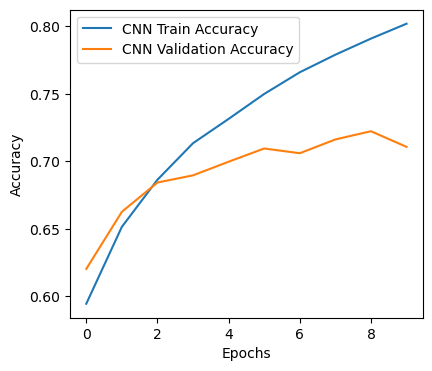

In [22]:
# Overfit Analysis
# Visualize training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


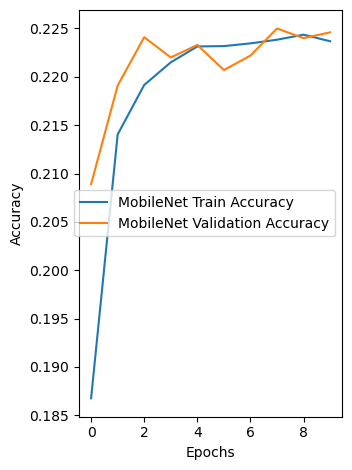

In [23]:
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Generate classification reports and confusion matrices
cnn_predictions = np.argmax(cnn_model.predict(x_test), axis=-1)
mobilenet_predictions = np.argmax(mobilenet_model.predict(x_test), axis=-1)

313/313 [==============================] - 11s 33ms/step


In [25]:
print("CNN Classification Report:\n", classification_report(y_test, cnn_predictions))
print("MobileNet Classification Report:\n", classification_report(y_test, mobilenet_predictions))

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.78      0.88      0.83      1000
           2       0.57      0.65      0.61      1000
           3       0.62      0.42      0.50      1000
           4       0.66      0.66      0.66      1000
           5       0.64      0.56      0.60      1000
           6       0.67      0.87      0.76      1000
           7       0.86      0.69      0.76      1000
           8       0.86      0.78      0.82      1000
           9       0.76      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

MobileNet Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.41      0.27      1000
           1       0.39      0.06      0.10      1000
           2    

In [26]:
cnn_confusion = confusion_matrix(y_test, cnn_predictions)
mobilenet_confusion = confusion_matrix(y_test, mobilenet_predictions)

In [28]:
# Print confusion matrices
print("CNN Confusion Matrix:\n", cnn_confusion)
print("MobileNet Confusion Matrix:\n", mobilenet_confusion)

CNN Confusion Matrix:
 [[788  29  45   7  18   6  15   4  50  38]
 [ 21 880   5   3   2   1   5   1   6  76]
 [ 77   9 648  28  68  46  92  15   8   9]
 [ 39  21 107 418  83 146 132  19  10  25]
 [ 27   7 108  32 662  28  81  40   9   6]
 [ 19  12  89 130  62 563  67  28   6  24]
 [  6   7  41  28  22  10 872   4   6   4]
 [ 27   7  69  21  78  69  10 690   6  23]
 [ 77  62  16   4   5   2   9   3 778  44]
 [ 32  96  10   6   6   2  14   3  23 808]]
MobileNet Confusion Matrix:
 [[407   2  52  25  35  14  90 218 130  27]
 [148  56  15  59  52  81 116 229 123 121]
 [214   5  90 100  43  67 174 193  65  49]
 [101  13  43 162  45 112 184 252  46  42]
 [282   1  34  53  49  33 167 261  76  44]
 [ 87  16  40 112  31 229 153 227  46  59]
 [178   5  32  64  52  77 328 194  35  35]
 [140   8  23  46  43  67  67 520  45  41]
 [246  15  26  46  28  33  84 195 272  55]
 [184  21  16  49  35  65  99 264 134 133]]
